# U.S. Medical Insurance Costs

Project Description:  This project starts with a large list containing basic life insurance data for a number of 
people. Tod date the Codecademy curriculum has used smaller snippets of this dataset to provide instruction in data handling and various data calculation techniques.  Primarily, the data is used to provide the clients in the list with a cost of insurance, given their particular circumstances including:

    * age
    * sex
    * bmi 
    * children 
    * smoker 
    * region
    * charges
    
The currrent Codecademy insurance pricing model used is as follows:

        insurance_cost = 250∗age − 128∗sex + 370∗bmi + 425∗num_of_children + 24000∗smoker − 12500

In this model an older, overweight, smoking, Gen-X father is potentially the costliest insurance, while a young, lean, non-smoking single Millennial woman has the cheapest insurance.  Everyone else's costs are somewhere in between these extremes. Typically, insurance places the highest health risks (i.e. costs) with smoking and secondarily with the number of children you have.  Obesity has a strong bearing on insurance risk, and being in the male cohort will always be a greater risk, because men typically  take higher physical risks than women.  It also goes without saying that the likelihood of death increases with age.

To begin in the study, we will use the above pricing model and calculate the estimated cost of insurance for each person in the database.  Then we can calculate a difference with the actual charges in the db. Then we will look at sex-based age distributions for the insured and their average insurance costs.  Then we will look at actual versus estimated insurance costs for both men and women by age cohort.

Next, we will deep dive into some of the aspects of the pricing model, namely BMI, smoking and age and investigate their effects on insurance rates. We will leverage the power of the python linear regression model in sklearn to predict insurance charges based on the BMI value supplied by the user and it will determine the nutritional status of the user based on the BMI and whether they are above, below or within the normal range of BMI for the population. We will then look at BMI by age cohort and visualize it using box-whisker plots of each age cohort.

We will start with function for accessing the data using the csv module and building a dictionary for the data.

In [1]:
import csv

def insurance_database():
    ins_db = []
    with open("insurance.csv", newline='') as ins_data:
        contents = csv.DictReader(ins_data)
        for line in contents:
            ins_db.append(line)
            
    return ins_db

print(insurance_database())       

[{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}, {'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}, {'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}, {'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}, {'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552'}, {'age': '31', 'sex': 'female', 'bmi': '25.74', 'children': '0', 'smoker': 'no', 'region': 'southeast', 'charges': '3756.6216'}, {'age': '46', 'sex': 'female', 'bmi': '33.44', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '8240.5896'}, {'age': '37', 'sex': 'female', 'bmi': '27.74', 'children': '3', 'smoker': 'no', 'region': 'northwest', 'charges'

Next we will have a function with will access the ins_db and estimate insurance cost as per the pricing model.

In [2]:
def estimate_insurance_costs():
    
    database = insurance_database()
    
    for client in database:
        insurance_cost = 0
        sex = 0
        smoker = 0
        age = int(client.get("age"))
        
        m_or_f = client.get("sex")
        if m_or_f == "male":
            sex = 1
        else:
            sex = 0
            
        bmi = float(client.get("bmi"))
        num_of_children = int(client.get("children"))
        
        is_smoker = client.get("smoker")
        
        if is_smoker == "yes":
            smoker = 1
        else:
            smoker = 0
        
        estimated_cost = (250 * age) - (128 * sex) + (370 * bmi) + (425 * num_of_children) + (24000 * smoker) - 12500
        rnd_est_cost = round(estimated_cost, 2)
        
        costs = {"estimate": rnd_est_cost}
        client.update(costs)
        
        
    return database

print(estimate_insurance_costs())

[{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924', 'estimate': 26573.0}, {'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523', 'estimate': 4791.9}, {'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462', 'estimate': 7857.0}, {'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061', 'estimate': 4022.85}, {'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552', 'estimate': 6057.6}, {'age': '31', 'sex': 'female', 'bmi': '25.74', 'children': '0', 'smoker': 'no', 'region': 'southeast', 'charges': '3756.6216', 'estimate': 4773.8}, {'age': '46', 'sex': 'female', 'bmi': '33.44', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '824

Now that we have calculated the estimated costs and have actual costs, we can look at costs by age bracket. In the following, we will build a function to build a barplot graphical representation of the cost by age class and sex.

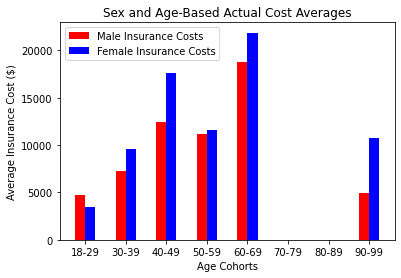

In [3]:
from matplotlib import pyplot
import numpy as np


def male_female_actual_costs():
    cohort18_29 = 0
    cohort30_39 = 0
    cohort40_49 = 0
    cohort50_59 = 0
    cohort60_69 = 0
    cohort70_79 = 0
    cohort80_89 = 0
    cohort90_99 = 0
    femcohort18_29 = 0
    femcohort30_39 = 0
    femcohort40_49 = 0
    femcohort50_59 = 0
    femcohort60_69 = 0
    femcohort70_79 = 0
    femcohort80_89 = 0
    femcohort90_99 = 0
    
    actual_costs = insurance_database()
    num_of_clients = len(actual_costs)
    for person in actual_costs:
        age_of_client = int(person.get('age'))
        charges_to_client = float(person.get('charges'))
        sex_of_client = person.get('sex')
        
        if sex_of_client == 'male':
            if age_of_client >= 18 and age_of_client < 29:
                cohort18_29 = (cohort18_29 + charges_to_client) / 2
            elif age_of_client >= 30 and age_of_client < 40:
                cohort30_39 = (cohort30_39 + charges_to_client) / 2
            elif age_of_client >= 40 and age_of_client < 50:
                cohort40_49 = (cohort40_49 + charges_to_client) / 2
            elif age_of_client >= 50 and age_of_client < 60:
                cohort50_59 = (cohort50_59 + charges_to_client) / 2
            elif age_of_client >= 60 and age_of_client < 70:
                cohort60_69 = (cohort60_69 + charges_to_client) / 2
            elif age_of_client >= 70 and age_of_client < 80:
                cohort70_79 = (cohort70_79 + charges_to_client) / 2
            elif age_of_client >= 80 and age_of_client < 90:
                cohort80_89 = (cohort80_89 + charges_to_client) / 2
            else: 
                cohort90_99 = (cohort90_99 + charges_to_client) / 2
        else:
            if age_of_client >= 18 and age_of_client < 29:
                femcohort18_29 = (femcohort18_29 + charges_to_client) / 2
            elif age_of_client >= 30 and age_of_client < 40:
                femcohort30_39 = (femcohort30_39 + charges_to_client) / 2
            elif age_of_client >= 40 and age_of_client < 50:
                femcohort40_49 = (femcohort40_49 + charges_to_client) / 2
            elif age_of_client >= 50 and age_of_client < 60:
                femcohort50_59 = (femcohort50_59 + charges_to_client) / 2
            elif age_of_client >= 60 and age_of_client < 70:
                femcohort60_69 = (femcohort60_69 + charges_to_client) / 2
            elif age_of_client >= 70 and age_of_client < 80:
                femcohort70_79 = (femcohort70_79 + charges_to_client) / 2
            elif age_of_client >= 80 and age_of_client < 90:
                femcohort80_89 = (femcohort80_89 + charges_to_client) / 2
            else: 
                femcohort90_99 = (femcohort90_99 + charges_to_client) / 2
            
    
    cohorts = ("18-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99")
    y_val = np.arange(len(cohorts))
    average_charges = [cohort18_29, cohort30_39, cohort40_49, cohort50_59, cohort60_69, cohort70_79, cohort80_89, cohort90_99]
    female_ave_charges = [femcohort18_29, femcohort30_39, femcohort40_49, femcohort50_59, femcohort60_69, femcohort70_79, femcohort80_89, femcohort90_99]
    
    
    pyplot.bar(y_val, average_charges, color='red', width=0.25)
    pyplot.bar(y_val + 0.25, female_ave_charges, color='blue', width=0.25)
    pyplot.xticks(y_val + 0.125, cohorts)
    pyplot.ylabel('Average Insurance Cost ($)')
    pyplot.xlabel('Age Cohorts')
    pyplot.title('Sex and Age-Based Actual Cost Averages')
    pyplot.legend(['Male Insurance Costs', 'Female Insurance Costs'])
    
    pyplot.show()
        
male_female_actual_costs()

Now that we have looked at the actual costs, we will turn our attention to the actuals versus the estimates and see how big the average difference is for men and women in all cohorts. 

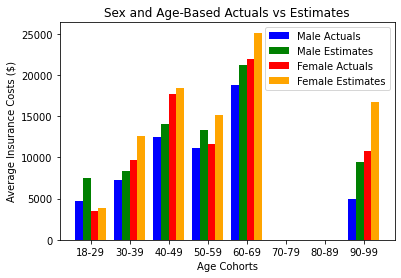

In [4]:
from matplotlib import pyplot
import numpy as np


def male_female_cost_differences():
    malecohort18_29 = 0
    malecohort30_39 = 0
    malecohort40_49 = 0
    malecohort50_59 = 0
    malecohort60_69 = 0
    malecohort70_79 = 0
    malecohort80_89 = 0
    malecohort90_99 = 0
    
    est_malecohort18_29 = 0
    est_malecohort30_39 = 0
    est_malecohort40_49 = 0
    est_malecohort50_59 = 0
    est_malecohort60_69 = 0
    est_malecohort70_79 = 0
    est_malecohort80_89 = 0
    est_malecohort90_99 = 0
   
    femcohort18_29 = 0
    femcohort30_39 = 0
    femcohort40_49 = 0
    femcohort50_59 = 0
    femcohort60_69 = 0
    femcohort70_79 = 0
    femcohort80_89 = 0
    femcohort90_99 = 0
    
    est_femcohort18_29 = 0
    est_femcohort30_39 = 0
    est_femcohort40_49 = 0
    est_femcohort50_59 = 0
    est_femcohort60_69 = 0
    est_femcohort70_79 = 0
    est_femcohort80_89 = 0
    est_femcohort90_99 = 0
    
    cost_differences = estimate_insurance_costs()
    num_of_clients = len(cost_differences)
    for person in cost_differences:
        age_of_client = int(person.get('age'))
        actual_cost = float(person.get('charges'))
        estimated_cost = float(person.get('estimate'))
        sex = str(person.get('sex'))
        
        
        if sex == 'male':
            if age_of_client >= 18 and age_of_client < 29:
                malecohort18_29 = (malecohort18_29 + actual_cost) / 2
                est_malecohort18_29 = (est_malecohort18_29 + estimated_cost) / 2
            elif age_of_client >= 30 and age_of_client < 40:
                malecohort30_39 = (malecohort30_39 + actual_cost) / 2
                est_malecohort30_39 = (est_malecohort30_39 + estimated_cost) / 2
            elif age_of_client >= 40 and age_of_client < 50:
                malecohort40_49 = (malecohort40_49 + actual_cost) / 2
                est_malecohort40_49 = (est_malecohort40_49 + estimated_cost) / 2
            elif age_of_client >= 50 and age_of_client < 60:
                malecohort50_59 = (malecohort50_59 + actual_cost) / 2
                est_malecohort50_59 = (est_malecohort50_59 + estimated_cost) / 2
            elif age_of_client >= 60 and age_of_client < 70:
                malecohort60_69 = (malecohort60_69 + actual_cost) / 2
                est_malecohort60_69 = (est_malecohort60_69 + estimated_cost) / 2
            elif age_of_client >= 70 and age_of_client < 80:
                malecohort70_79 = (malecohort70_79 + actual_cost) / 2
                est_malecohort70_79 = (est_malecohort70_79 + estimated_cost) / 2
            elif age_of_client >= 80 and age_of_client < 90:
                malecohort80_89 = (malecohort80_89 + actual_cost) / 2
                est_malecohort80_89 = (est_malecohort80_89 + estimated_cost) / 2
            else: 
                malecohort90_99 = (malecohort90_99 + actual_cost) / 2
                est_malecohort90_99 = (est_malecohort90_99 + estimated_cost) / 2
        else:
            if age_of_client >= 18 and age_of_client < 29:
                femcohort18_29 = (femcohort18_29 + actual_cost) / 2
                est_femcohort18_29 = (est_femcohort18_29 + estimated_cost) / 2
            elif age_of_client >= 30 and age_of_client < 40:
                femcohort30_39 = (femcohort30_39 + actual_cost) / 2
                est_femcohort30_39 = (est_femcohort30_39 + estimated_cost) / 2
            elif age_of_client >= 40 and age_of_client < 50:
                femcohort40_49 = (femcohort40_49 + actual_cost) / 2
                est_femcohort40_49 = (est_femcohort40_49 + estimated_cost) / 2
            elif age_of_client >= 50 and age_of_client < 60:
                femcohort50_59 = (femcohort50_59 + actual_cost) / 2
                est_femcohort50_59 = (est_femcohort50_59 + estimated_cost) / 2
            elif age_of_client >= 60 and age_of_client < 70:
                femcohort60_69 = (femcohort60_69 + actual_cost) / 2
                est_femcohort60_69 = (est_femcohort60_69 + estimated_cost) / 2
            elif age_of_client >= 70 and age_of_client < 80:
                femcohort70_79 = (femcohort70_79 + actual_cost) / 2
                est_femcohort70_79 = (est_femcohort70_79 + estimated_cost) / 2
            elif age_of_client >= 80 and age_of_client < 90:
                femcohort80_89 = (femcohort80_89 + actual_cost) / 2
                est_femcohort80_89 = (est_femcohort80_89 + estimated_cost) / 2
            else: 
                femcohort90_99 = (femcohort90_99 + actual_cost) / 2
                est_femcohort90_99 = (est_femcohort90_99 + estimated_cost) / 2
            
    
    cohorts = ("18-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99")
    y_val = np.arange(len(cohorts))
    male_average_charges = [malecohort18_29, malecohort30_39, malecohort40_49, malecohort50_59, malecohort60_69, malecohort70_79, malecohort80_89, malecohort90_99]
    female_ave_charges = [femcohort18_29, femcohort30_39, femcohort40_49, femcohort50_59, femcohort60_69, femcohort70_79, femcohort80_89, femcohort90_99]
    male_average_estimates = [est_malecohort18_29, est_malecohort30_39, est_malecohort40_49, est_malecohort50_59, est_malecohort60_69, est_malecohort70_79, est_malecohort80_89, est_malecohort90_99]
    female_ave_estimates = [est_femcohort18_29, est_femcohort30_39, est_femcohort40_49, est_femcohort50_59, est_femcohort60_69, est_femcohort70_79, est_femcohort80_89, est_femcohort90_99]
    
    pyplot.bar(y_val, male_average_charges, color='blue', width=0.20)
    pyplot.bar(y_val + 0.2, male_average_estimates, color='green', width=0.20)
    pyplot.bar(y_val + 0.4, female_ave_charges, color='red', width=0.20)
    pyplot.bar(y_val + 0.6, female_ave_estimates, color='orange', width=0.20)
    pyplot.xticks(y_val + 0.3, cohorts)
    pyplot.ylabel('Average Insurance Costs ($)')
    pyplot.xlabel('Age Cohorts')
    pyplot.title('Sex and Age-Based Actuals vs Estimates')
    pyplot.legend(['Male Actuals', 'Male Estimates', 'Female Actuals', 'Female Estimates'])
    
    pyplot.show()
    
    
    
        
male_female_cost_differences()

## BMI - Body Mass Index

'The obesity epidemic in the United States has proven difficult to reverse. We have not been successful in helping people sustain the eating and physical activity patterns that are needed to maintain a healthy body weight. There is growing recognition that we will not be able to sustain healthy lifestyles until we are able to address the environment and culture that currently support unhealthy lifestyles' [Mitchell et al., Psychiatr Clin North Am. 2011 Dec;34(4):717-32].

In this part of the study, people will be assessed on their BMI, which is a index that indicates an individuals' nutritional status.  We will examine BMI as it relates to insurance cost with regression analysis, and create a predictive cost model using the regression, so clients can get a ballpark idea of cost by their BMI. Then we will examine BMI by age cohort and construct box-whisker plots to show the distribution and averages of BMIs with age.

    BMI > 30: obese
    BMI >= 25 and bmi <= 30: overweight
    BMI >= 18.5 and bmi < 25: normal weight
    BMI < 18.5: underweight
    

In [5]:
import statistics as stats
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

def bmi_nutritional_status(bmi_value):
    ins_db = insurance_database()
    client_bmi = []
    client_costs = []
    status = ""
    bmi_comp = ""
    
    for fatness in ins_db:
        client_bmi.append(float(fatness.get('bmi')))
        client_costs.append(float(fatness.get('charges')))
        
    costs_transformed = np.array(client_costs)
    bmi_transformed = np.array(client_bmi).reshape(-1, 1) #this makes x axis values for model
    
    insurance_model = LinearRegression().fit(bmi_transformed, costs_transformed)
    r_sq = insurance_model.score(bmi_transformed, costs_transformed)
    print('Coefficient of Determination: ', r_sq)
    print('Intercept: ', insurance_model.intercept_)
    print('Slope: ', insurance_model.coef_)
    
    bmi_new = np.array(bmi_value).reshape((-1, 1))
    cost_new = int(insurance_model.predict(bmi_new))
    if bmi_new >= 30:
        status = "Obese"
    elif bmi_new >= 25 and bmi_new < 30:
        status = "Overweight"
    elif bmi_new >= 18.5 and bmi_new < 25:
        status = "Normal"
    else:
        status = "Underweight"
        
    average_bmi = stats.mean(client_bmi)
    bmi_quartiles = stats.quantiles(client_bmi, n=4, method='inclusive')
    std_bmi = stats.pstdev(client_bmi, mu=None)
    low_range = average_bmi - std_bmi
    high_range = average_bmi + std_bmi
    
    if bmi_value >= high_range:
        bmi_comp = "above average population BMI range"
    elif bmi_value >= low_range and bmi_value < high_range:
        bmi_comp = "within average population BMI range"
    else:
        bmi_comp = "below average population BMI range"
        
        
    print("Insurance cost prediction for BMI of: {b} is: ${c} dollars.".format(b=bmi_value, c=cost_new))
    print("Your BMI is classed as {s} and is {b}.".format(s=status, b=bmi_comp ))
    print("Population average BMI is: {a}".format(a=average_bmi))
    print("BMI Quartiles (25%, 50%, 75%): ", bmi_quartiles)
    
    
    
    
bmi_nutritional_status(21)

Coefficient of Determination:  0.03933913991786264
Intercept:  1192.9372089611497
Slope:  [393.8730308]
Insurance cost prediction for BMI of: 21 is: $9464 dollars.
Your BMI is classed as Normal and is below average population BMI range.
Population average BMI is: 30.66339686098655
BMI Quartiles (25%, 50%, 75%):  [26.29625, 30.4, 34.69375]


Next we will examine the age distributions for BMI and see the nutritional statuses of each age cohort using box-whisker plots.

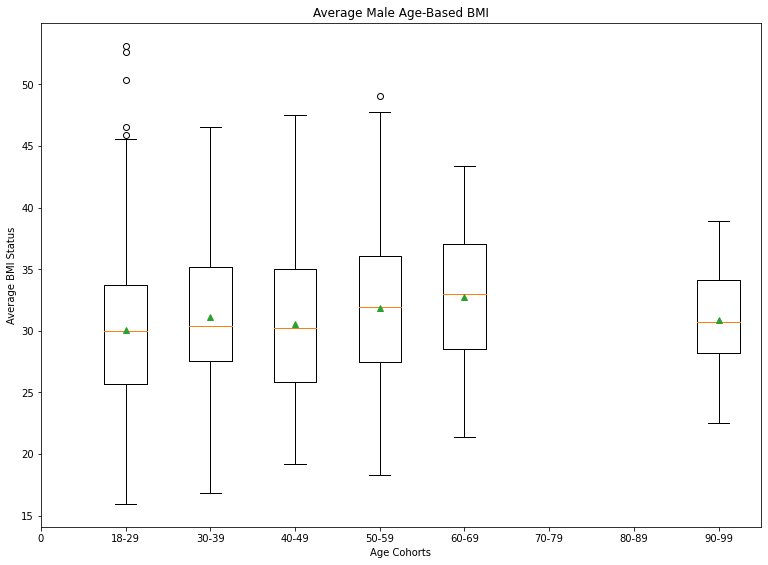

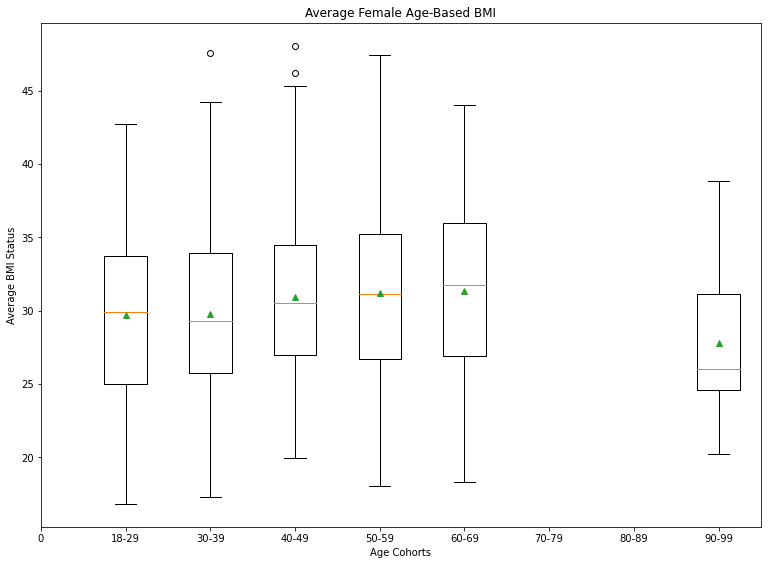

In [6]:
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt

def age_dist_BMI():
    malecohort18_29 = []
    malecohort30_39 = []
    malecohort40_49 = []
    malecohort50_59 = []
    malecohort60_69 = []
    malecohort70_79 = []
    malecohort80_89 = []
    malecohort90_99 = []
    
    femcohort18_29 = []
    femcohort30_39 = []
    femcohort40_49 = []
    femcohort50_59 = []
    femcohort60_69 = []
    femcohort70_79 = []
    femcohort80_89 = []
    femcohort90_99 = []
    
    
    ins_data = insurance_database()
    
    for client in ins_data:
        age_of_client = int(client.get('age'))
        sex_of_client = str(client.get('sex'))
        bmi_of_client = float(client.get('bmi'))
        
        if sex_of_client == 'male':
            if age_of_client >= 18 and age_of_client < 29:
                malecohort18_29.append(bmi_of_client)
            elif age_of_client >= 30 and age_of_client < 40:
                malecohort30_39.append(bmi_of_client)
            elif age_of_client >= 40 and age_of_client < 50:
                malecohort40_49.append(bmi_of_client)
            elif age_of_client >= 50 and age_of_client < 60:
                malecohort50_59.append(bmi_of_client)
            elif age_of_client >= 60 and age_of_client < 70:
                malecohort60_69.append(bmi_of_client)
            elif age_of_client >= 70 and age_of_client < 80:
                malecohort70_79.append(bmi_of_client)
            elif age_of_client >= 80 and age_of_client < 90:
                malecohort80_89.append(bmi_of_client)
            else: 
                malecohort90_99.append(bmi_of_client)
        else:
            if age_of_client >= 18 and age_of_client < 29:
                femcohort18_29.append(bmi_of_client)
            elif age_of_client >= 30 and age_of_client < 40:
                femcohort30_39.append(bmi_of_client)
            elif age_of_client >= 40 and age_of_client < 50:
                femcohort40_49.append(bmi_of_client)
            elif age_of_client >= 50 and age_of_client < 60:
                femcohort50_59.append(bmi_of_client)
            elif age_of_client >= 60 and age_of_client < 70:
                femcohort60_69.append(bmi_of_client)
            elif age_of_client >= 70 and age_of_client < 80:
                femcohort70_79.append(bmi_of_client)
            elif age_of_client >= 80 and age_of_client < 90:
                femcohort80_89.append(bmi_of_client)
            else: 
                femcohort90_99.append(bmi_of_client)
  
    m_coh_1 = malecohort18_29
    m_coh_2 = malecohort30_39 
    m_coh_3 = malecohort40_49
    m_coh_4 = malecohort50_59
    m_coh_5 = malecohort60_69
    m_coh_6 = malecohort70_79
    m_coh_7 = malecohort80_89
    m_coh_8 = malecohort90_99
    
    cohorts = ("0", "18-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99")
    cohort_data = [m_coh_1, m_coh_2, m_coh_3, m_coh_4, m_coh_5, m_coh_6, m_coh_7, m_coh_8] #removed 6 and 7
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(cohort_data, showmeans=True)
    pyplot.ylabel('Average BMI Status')
    pyplot.xlabel('Age Cohorts')
    pyplot.title('Average Male Age-Based BMI')
    y_val = np.arange(len(cohorts))
    pyplot.xticks(y_val, cohorts)
    plt.show()
    
    fem_coh_1 = femcohort18_29
    fem_coh_2 = femcohort30_39 
    fem_coh_3 = femcohort40_49
    fem_coh_4 = femcohort50_59
    fem_coh_5 = femcohort60_69
    fem_coh_6 = femcohort70_79
    fem_coh_7 = femcohort80_89
    fem_coh_8 = femcohort90_99
    
    cohorts = ("0", "18-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99")
    cohort_data = [fem_coh_1, fem_coh_2, fem_coh_3, fem_coh_4, fem_coh_5, fem_coh_6, fem_coh_7, fem_coh_8] 
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(cohort_data, showmeans=True)
    pyplot.ylabel('Average BMI Status')
    pyplot.xlabel('Age Cohorts')
    pyplot.title('Average Female Age-Based BMI')
    y_val = np.arange(len(cohorts))
    pyplot.xticks(y_val, cohorts)
    plt.show()
    
    
age_dist_BMI()


## Smoking

'Without exception, epidemiological studies have demonstrated a consistent association between smoking and lung cancer in men and now suggest a similar association in women. The results of treatment of lung cancer are not encouraging; despite vigorous therapy, the 5-year survival rate remains less than 10%. The social and economic costs of lung cancer and the smoking habit impinge on the productiveness of our society'. [Loeb et al., 
Cancer Res. 1984 Dec;44(12 Pt 1):5940-58.].

Without any doubt, smoking is a killer.  'Tobacco smoking is the cause of 30 to 40% of deaths from cancer' [Loeb et al.,1984]. Insurance costs reflect this health outcome and have become incredibly punitive towards those who chose to smoke. Costs are so prohibitive with respect to smoking, that most smokers often fail to obtain life insurance. 

In this section of the study we will look at the connections between having children and smoker-status.  We will examine the correlations between these factors and conduct regression analysis to examine the causal links.  We will also run a comparison of insurance costs for those clients who smoke and show the cost savings involved in cessation.

In [ ]:
from scipy.stats import spearman
smoker_and_kids = 0
non_smoker_and_kids = 0
smoker_and_no_kids = 0
non_smoker_and_no_kids = 0

def smoking_and_kids():
    smokin_gun = insurance_database()
    for smoker in smokin_gun:
        smoke_status = str(smoker.get(('smoker')))
        num_of_child = int(smoker.get('children'))
        if smoke_status == 'yes' and num_of_child > 0:
            smoker_and_kids += 1
        elif smoke_status == 'no' and num_of_child > 0:
            non_smoker_and_kids += 1
        elif smoke_status == 'yes' and num_of_child == 0:
            smoker_and_no_kids += 1
        else:
            non_smoker_and_no_kids += 1
    
    
        
            
    

## Age

As stated earlier, the older you get, the greater the likelihood of dying.  Seems trivial to say so, but it is an inherent risk factor that is forever increasing.  As we age, it is well known that health issues tend to multiply and compound one another.  As the body ages, the costs to our healthcare system increase strongly.  Insurance thusly, ratchets up with age.  